# Unit 5 - Financial Planning


In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [9]:
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)
print(btc_data)
print(eth_data)

<Response [200]>
<Response [200]>


In [48]:
btc_content = btc_data.content
eth_content = eth_data.content
btc_content

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18523306,\n\t\t\t"total_supply": 18523306,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 12753.4500000000000000,\n\t\t\t\t\t"volume_24h": 27399843850,\n\t\t\t\t\t"market_cap": 236236034213,\n\t\t\t\t\t"percentage_change_1h": -0.6243253567431390,\n\t\t\t\t\t"percentage_change_24h": 6.7474061975435100,\n\t\t\t\t\t"percentage_change_7d": 11.6167597573942000,\n\t\t\t\t\t"percent_change_1h": -0.6243253567431390,\n\t\t\t\t\t"percent_change_24h": 6.7474061975435100,\n\t\t\t\t\t"percent_change_7d": 11.6167597573942000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 16742.72916,\n\t\t\t\t\t"volume_24h": 35970515006.28,\n\t\t\t\t\t"market_cap": 310130665714.826,\n\t\t\t\t\t"percent_change_1h": -0.6243253567431390,\n\t\t\t\t\t"percent_change_24h": 6.7474061975435100,\n\t\t\t\t\t"p

In [59]:
btc = btc_data.json()
eth = eth_data.json()
import json
print(json.dumps(btc, indent=4))
print(json.dumps(eth, indent=4))
# btc

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18523306,
            "total_supply": 18523306,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 12753.45,
                    "volume_24h": 27399843850,
                    "market_cap": 236236034213,
                    "percentage_change_1h": -0.624325356743139,
                    "percentage_change_24h": 6.74740619754351,
                    "percentage_change_7d": 11.6167597573942,
                    "percent_change_1h": -0.624325356743139,
                    "percent_change_24h": 6.74740619754351,
                    "percent_change_7d": 11.6167597573942
                },
                "CAD": {
                    "price": 16742.72916,
                    "volume_24h": 35970515006.28,
                    "

In [71]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_price = btc["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
# YOUR CODE HERE!]
etc_price = eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth *etc_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15304.14
The current value of your 5.3 ETH is $2088.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [16]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [61]:
today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
today

'2020-10-21T00:00:00-04:00'

In [66]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   

                                                             
                             high     low   close    volume  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032

In [68]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.515
Current SPY closing price: $342.69


In [69]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


### Savings Health Analysis

In [80]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
print(total_crypto)
total_shares = my_agg_value + my_spy_value
print(total_shares)
# Create savings DataFrame
# YOUR CODE HERE!
savings = {"amount":[total_crypto,total_shares]}
df_savings = pd .DataFrame(savings, index=["crypto","shares"])


# Display savings DataFrame
display(df_savings)

17392.181
40637.5


,amount
crypto,17392.181
shares,40637.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA211BC700>],
      dtype=object)

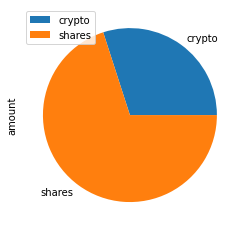

In [81]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True)

In [82]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares


# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"Congratulations you have enough money in your fund.")
elif total_savings==emergency_fund:
    print(f"Congratulation for reaching your financial goal.")
elif total_savings<emergency_fund:
    print(f"You are {(emergency_fund - total_savings):0.2f} away from your goal")

Congratulations you have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [83]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()

In [84]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   

                                                              
                             high     low   close     volume  
2015-10-21 00:00:00-04:00  203.79  201.65  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344

In [85]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [86]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30years.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-21 00:00:00-04:00          NaN  203.61  203.79  201.65  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   

                                                   
                              volume daily_return  
2015-10-21 00:00:00-04:00   83704739          NaN  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884

In [87]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998962,0.991951,1.009841,0.994577,1.000141,0.999196,0.987287,0.994419,0.999082,0.995667,...,1.002163,1.006633,1.004662,1.006840,1.002026,0.997782,1.001050,1.016568,1.007509,1.002819
2,0.991644,0.991977,1.017186,0.992514,1.015287,1.009132,0.982276,0.993900,1.005404,0.988966,...,1.007364,1.008268,0.997633,1.007097,1.011345,0.994516,0.996427,1.020435,0.998495,1.003262
3,0.992275,1.002395,1.020848,1.003609,1.019168,1.018246,0.993031,0.986413,1.016881,1.003745,...,0.993306,1.004895,1.009018,1.017007,0.992261,0.998566,0.990478,1.014313,0.992397,1.002247
4,0.985370,0.996698,1.027911,1.003498,1.007792,1.018463,0.992922,0.991536,1.016248,1.012884,...,0.988097,1.013321,1.017822,1.013730,1.006068,1.003987,0.993141,1.019216,1.000447,1.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,28.498499,8.086465,22.826640,17.101426,8.376735,7.199939,4.674942,15.145603,7.578477,13.246958,...,10.035854,10.075365,4.723884,5.185577,17.276388,17.433021,5.515631,10.883898,5.344384,5.896382
7557,28.276982,8.102331,22.823019,17.175691,8.317922,7.124848,4.653927,15.169864,7.611484,13.195232,...,10.063103,10.049315,4.648015,5.193968,17.323432,17.473234,5.568758,10.998082,5.279893,5.925550
7558,28.404386,8.063792,23.096684,17.170012,8.326989,7.149721,4.641917,15.351060,7.555358,13.095335,...,10.013486,10.031235,4.658741,5.190932,17.203425,17.573074,5.573818,11.016780,5.358848,5.888142
7559,28.557720,8.179991,23.096491,17.055782,8.508363,7.158841,4.654302,15.286021,7.497009,13.094637,...,10.135478,10.101274,4.597466,5.179833,17.160491,17.841977,5.653910,10.962052,5.300859,5.986796


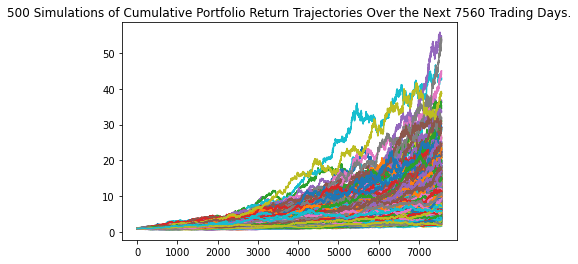

In [92]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30years.plot_simulation()
line_plot.get_figure().savefig("MC_30years_sim_plot.png", bbox_inches="tight")

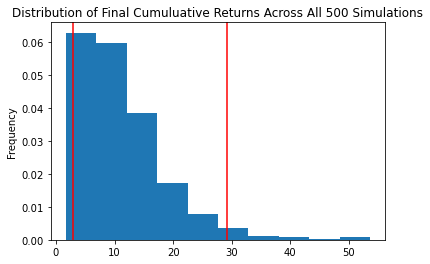

In [93]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             11.276066
std               7.424199
min               1.664827
25%               5.836679
50%               9.498531
75%              14.776187
max              53.630688
95% CI Lower      2.887370
95% CI Upper     29.173248
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [95]:
tbl

count           500.000000
mean             11.276066
std               7.424199
min               1.664827
25%               5.836679
50%               9.498531
75%              14.776187
max              53.630688
95% CI Lower      2.887370
95% CI Upper     29.173248
Name: 7560, dtype: float64

In [96]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(initial_investment*tbl["95% CI Lower"],2)
ci_upper = round(initial_investment*tbl["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57747.4 and $583464.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [99]:
# Set initial  
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower2 = (initial_investment2*tbl["95% CI Lower"])
ci_upper2= (initial_investment2*tbl["95% CI Upper"])

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86621.1012808973 and $875197.4439560685


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [100]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_5years.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-21 00:00:00-04:00          NaN  203.61  203.79  201.65  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   

                                                   
                              volume daily_return  
2015-10-21 00:00:00-04:00   83704739          NaN  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884

In [101]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990143,1.009907,0.995006,0.995111,0.994557,0.987424,0.998758,1.004656,1.003053,1.009836,...,0.996911,0.999643,0.991911,0.989167,0.997211,0.998490,1.005939,0.985501,0.998312,1.005367
2,0.982012,1.003644,0.975529,1.000559,0.974118,0.987164,0.998610,0.999324,1.015189,0.999345,...,0.990320,1.010048,0.996928,0.973892,0.998375,1.001378,1.012075,0.989824,0.999697,0.986047
3,0.976988,0.983678,0.979478,0.995136,0.969685,0.985705,0.996447,0.993104,1.013183,1.010027,...,0.995350,1.012887,0.995343,0.981574,1.018753,1.003414,1.007321,0.997577,0.991947,0.993344
4,0.972105,0.976590,0.976785,1.002168,0.952173,0.984689,0.996711,0.989108,1.018109,1.000088,...,0.999725,1.010456,0.995640,0.986462,1.020990,0.994661,1.011918,1.000812,0.989454,0.988908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.407685,1.474934,1.004877,1.352301,1.596691,1.351314,1.254328,1.188922,1.759500,1.495730,...,1.152772,1.446881,1.411095,1.058498,3.115339,1.458574,1.926007,1.517583,1.212503,2.357539
1257,1.418818,1.462635,1.004768,1.359187,1.600237,1.357841,1.266515,1.188055,1.751742,1.484949,...,1.151806,1.452918,1.392242,1.054145,3.102984,1.470633,1.914541,1.533372,1.227335,2.363727
1258,1.444288,1.453807,1.001696,1.365759,1.598548,1.348250,1.261936,1.160594,1.749323,1.477671,...,1.154923,1.472688,1.394527,1.054893,3.101169,1.486624,1.924593,1.530461,1.242544,2.324595
1259,1.424256,1.450004,1.006064,1.378508,1.608462,1.359686,1.239572,1.175898,1.743198,1.481292,...,1.163959,1.470206,1.397807,1.068772,3.098019,1.478371,1.940147,1.520170,1.256236,2.325187


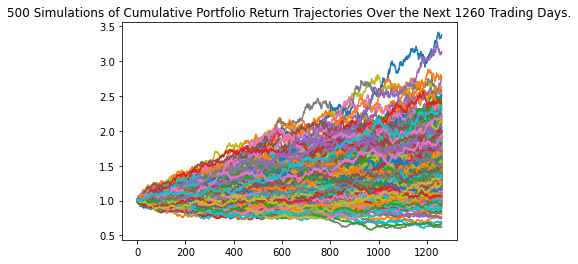

In [102]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot5y = MC_5years.plot_simulation()

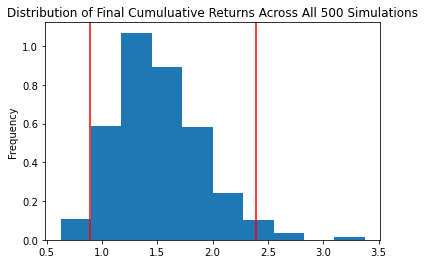

In [103]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot5y = MC_5years.plot_distribution()

In [104]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl5 = MC_5years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl5)

count           500.000000
mean              1.518295
std               0.403489
min               0.624676
25%               1.238519
50%               1.473193
75%               1.747066
max               3.375488
95% CI Lower      0.894224
95% CI Upper      2.387353
Name: 1260, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
# YOUR CODE HERE!
ci_lower_five = round(initial_investment3*tbl5["95% CI Lower"],2)
ci_upper_five = round(initial_investment3*tbl5["95% CI Upper"],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52568.6 and $141946.45


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")